In [14]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as scisig
import scipy.optimize as opt
import analysis_utils as au

In [7]:
filename = 'D:/Lab Data/diamond/240521/Mass/Particle 1/'
data = sio.loadmat(filename + 'NoChargeNoDrive.mat')
tt_ncnd = np.transpose(data['D'])[0]
fs_ncnd = int(1/data['Tinterval'][0][0])

In [9]:
nps_frac = 0.01
PSD_ncnd = scisig.welch(tt_ncnd, fs = fs_ncnd, nperseg = int(nps_frac*fs_ncnd))

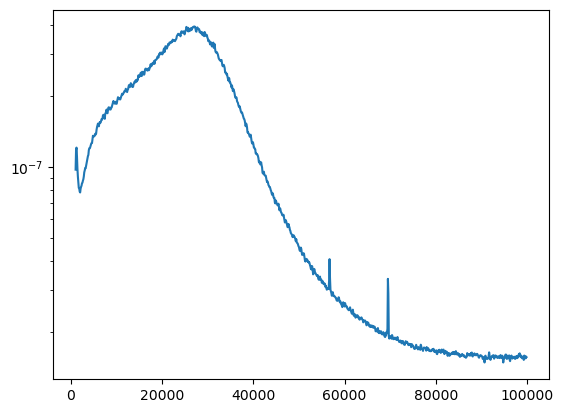

In [13]:
lb = int(nps_frac*1000)
ub = int(nps_frac*100000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.yscale('log')

In [45]:
lb = int(nps_frac*15000)
ub = int(nps_frac*100000)
fit_ncnd, cov_ncnd = opt.curve_fit(au.Linewidth2, PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub], p0 = [10**7, 30000, 10000, 2*10**(-8)])
print(fit_ncnd)
fitted_ncnd = au.Linewidth2(PSD_ncnd[0], *fit_ncnd)

[6.28109481e+06 3.03187142e+04 2.05891537e+04 1.19207930e-08]


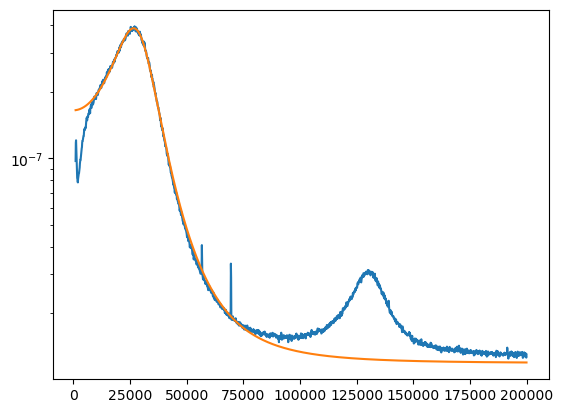

In [46]:
lb = int(nps_frac*1000)
ub = int(nps_frac*200000)
plt.figure()
plt.plot(PSD_ncnd[0][lb:ub], PSD_ncnd[1][lb:ub])
plt.plot(PSD_ncnd[0][lb:ub], fitted_ncnd[lb:ub])
plt.yscale('log')

In [48]:
lb = int(nps_frac*15000)
ub = int(nps_frac*60000)
area_1 = np.trapz(PSD_ncnd[1][lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
lb = int(nps_frac*0)
ub = int(nps_frac*200000)
area_2 = np.trapz(fitted_ncnd[lb:ub], PSD_ncnd[0][lb:ub]) - (lb-ub)/nps_frac*fit_ncnd[3]
print(area_1)
print(area_2)
# Use area_2 for uncalibrated variance of oscillator

0.008895046223447604
0.015494922125047578


In [49]:
# Let's make a graph of charge changes to put in presentation

In [60]:
filename = 'D:/Lab Data/diamond/240521/Charging/Particle 1/Before/Before_'
files = [1, 2, 3, 4, 5]
end = '.mat'

In [62]:
np.transpose(data['E'])[0]

array([-0.00207545, -0.00265535, -0.0017855 , ..., -0.00294531,
       -0.00323526, -0.00323526], dtype=float32)

In [63]:
X = np.zeros(0)
theta = np.zeros(0)
HV = np.zeros(0)
for file in files:
    data = sio.loadmat(filename+str(file)+end)
    X = np.concatenate((X, np.transpose(data['E'])[0]))
    theta = np.concatenate((theta, np.transpose(data['F'])[0]))
    HV = np.concatenate((HV, np.transpose(data['G'])[0]))


Text(0, 0.5, 'Charge (e)')

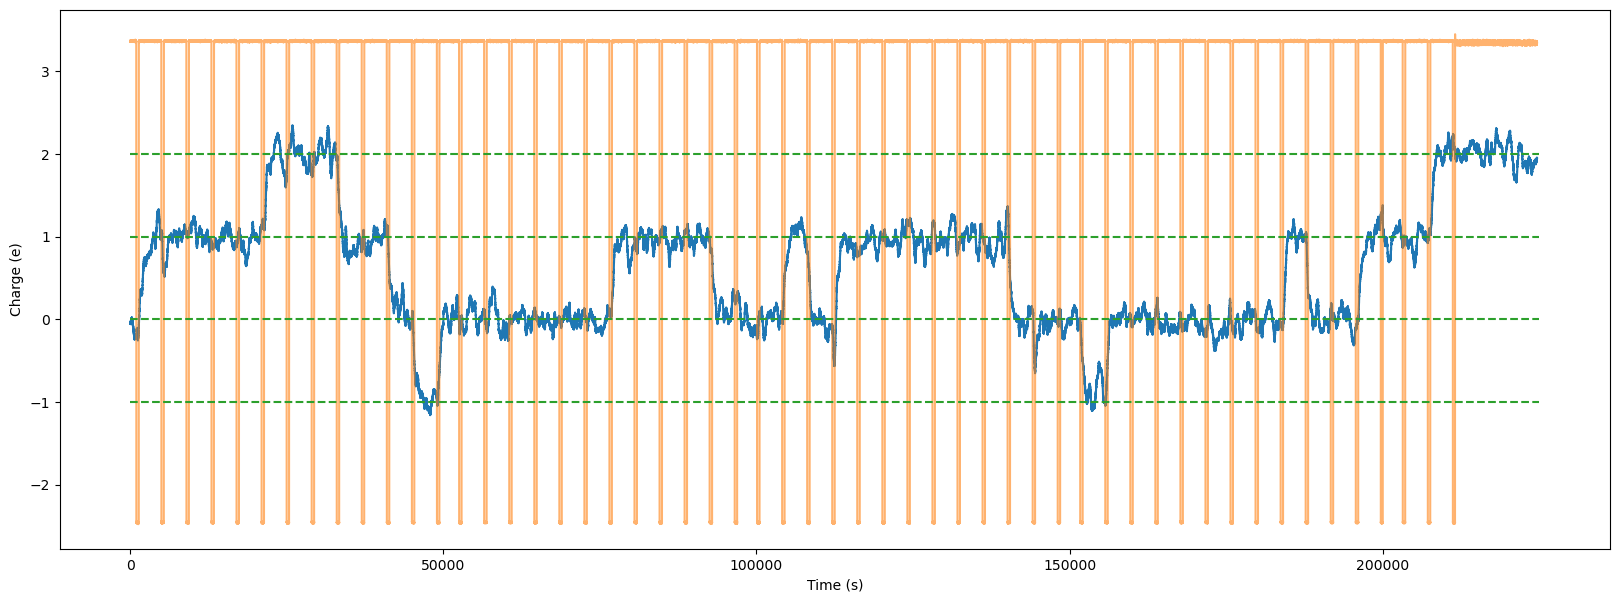

In [84]:
plt.figure(figsize = (20, 7))
plt.plot(X/0.06)
plt.plot((HV/3+0.2)/0.06, alpha = 0.6)
plt.plot([0, 225000], [-1, -1], 'tab:green', linestyle = '--')
plt.plot([0, 225000], [0.0, 0.0], 'tab:green', linestyle = '--')
plt.plot([0, 225000], [1, 1], 'tab:green', linestyle = '--')
plt.plot([0, 225000], [2, 2], 'tab:green', linestyle = '--')
plt.xlabel('Time (s)')
plt.ylabel('Charge (e)')

In [85]:
# So two charges on particle before frequency comb